In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
import pickle
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick

from os import mkdir
from os.path import isdir
rcParams = {'font.size': 24 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}
plt.rcParams.update(rcParams)

data_dir = '/Users/harihara/Research-Activities/Data/SCRAPT/Lupus-Microbiome-Published/'

colors = ['#377eb8','lime','C1', '#a65628', '#AAAA00','#bbbbbb','#000000']

alpha = [0.1,0.5, 1.0, 5.0, 10.0]
keys = ['Adaptive_With_Modeshifting',  'Adaptive_Without_Modeshifting', 
        'Fixed_With_Modeshifting',  'Fixed_Without_Modeshifting','DNACLUST', 'CDHIT', 'UCLUST']
titles = ['Adaptive Sampling + Mode-Shifting (SCRAPT)', 'Adaptive Sampling Without Mode-Shifting',
          'Naive Sampling + Mode-Shifting', 'Naive Sampling Without Mode-Shifting',
          'DNACLUST', 'CDHIT', 'UCLUST']
out_path = '/Users/harihara/Research-Activities/Plots/Iterative_Clustering/ISMB_Figures/'
if not isdir(out_path):
    mkdir(out_path)
    
f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))


In [4]:
s = 0.98
sim = pickle.load(open(data_dir+'/sim_'+str(s)+'.pkl', "rb"))
n = 980180 
times = {0.99:19, 0.98:13, 0.97:8, 0.96:5, 0.95:4}
#n = 1773145
#times = {0.99:36, 0.98:32, 0.97:20, 0.96:13, 0.95:12}
print(sim.keys())


dict_keys(['DNACLUST', 5.0, 10.0, 0.5, 1.0, 0.1, 'CDHIT', 'UCLUST'])


Plot the Number of sequences clustered in each iteration for SCRAPT

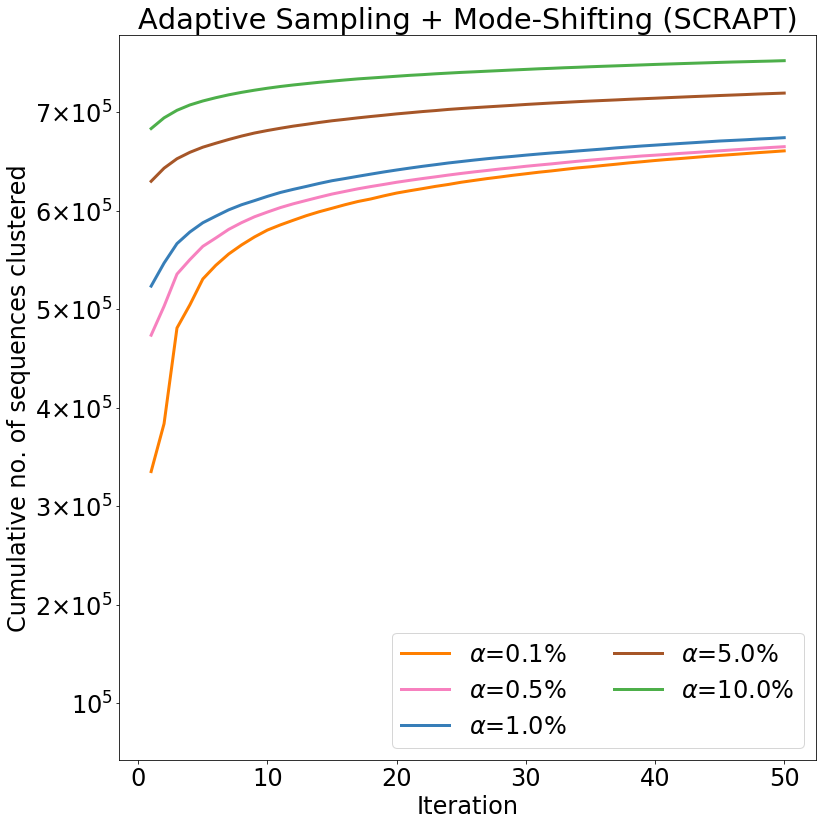

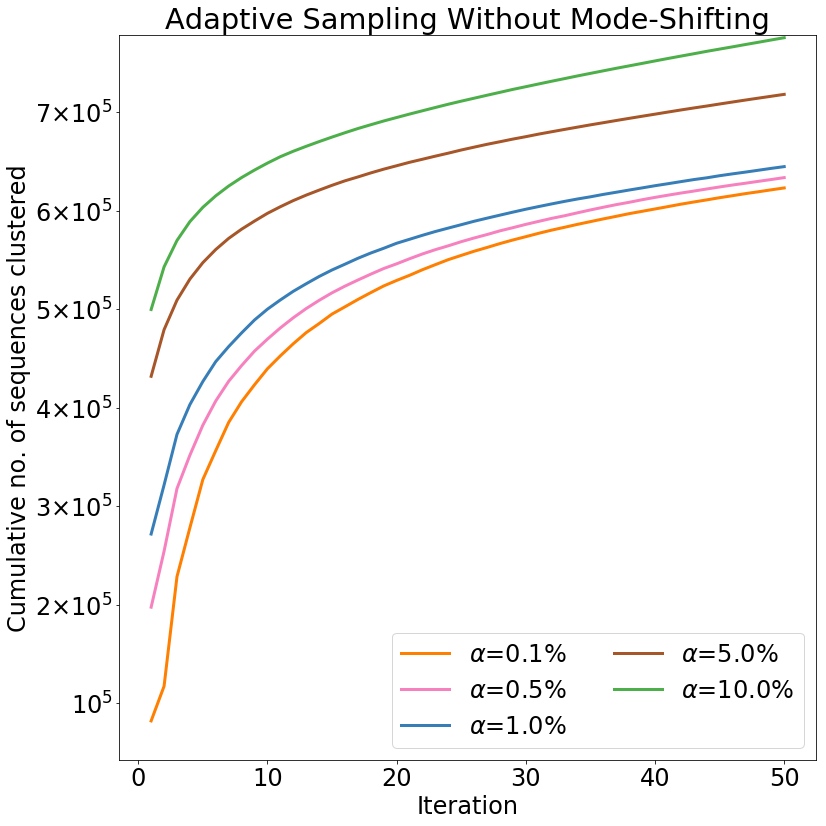

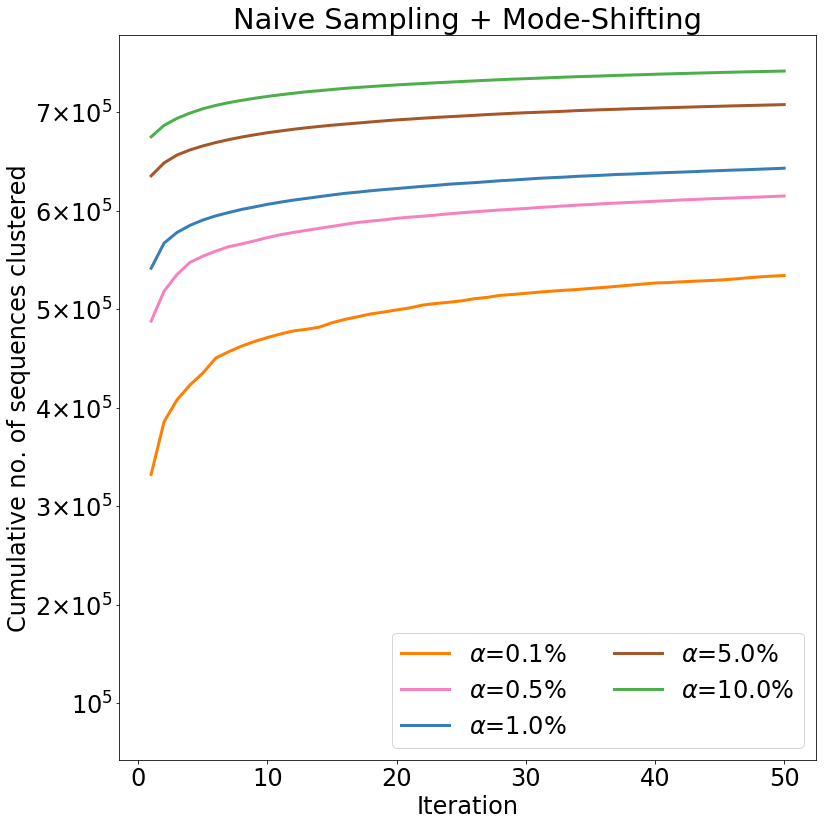

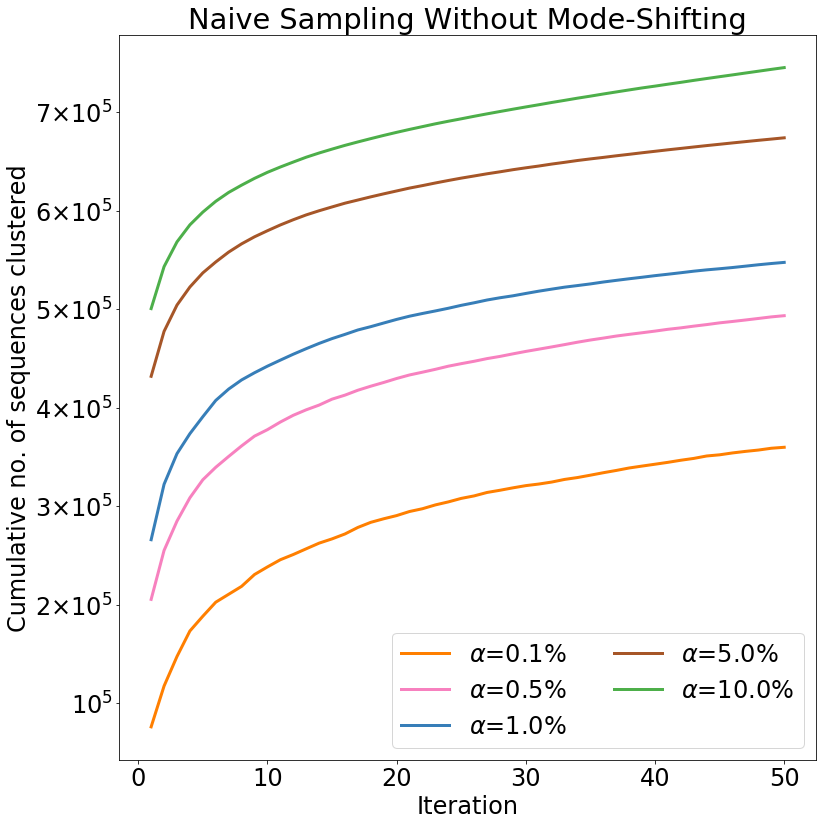

In [18]:
plt.rcParams.update(rcParams)
figures = []

for i in range(4):
    fig,ax = plt.subplots(1,1,figsize = (12,12))
    for j in range(len(alpha)):
        ax.plot(np.cumsum(sim[alpha[j]][keys[i]]['Cluster_Summary']['Seq_Counts']), color = colors[j], 
                label = r'$\alpha$='+str(alpha[j])+'%', linewidth=3)    
    ax.set_title(titles[i])
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Cumulative no. of sequences clustered')
    ax.legend(loc = 4, ncol = 2)
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(g))
    fig.tight_layout()
    figures.append((fig,ax))

ylim = figures[3][1].get_ylim()
figures[0][1].set_ylim(ylim)
figures[1][1].set_ylim(ylim)
figures[2][1].set_ylim(ylim)

for i in range(0,len(figures)):
    figures[i][0].savefig(out_path+'Cum_Seq_'+keys[i]+'_0.99.pdf')


0.1 12.66
0.5 13.0
1.0 12.730000000000002
5.0 17.77
10.0 27.22


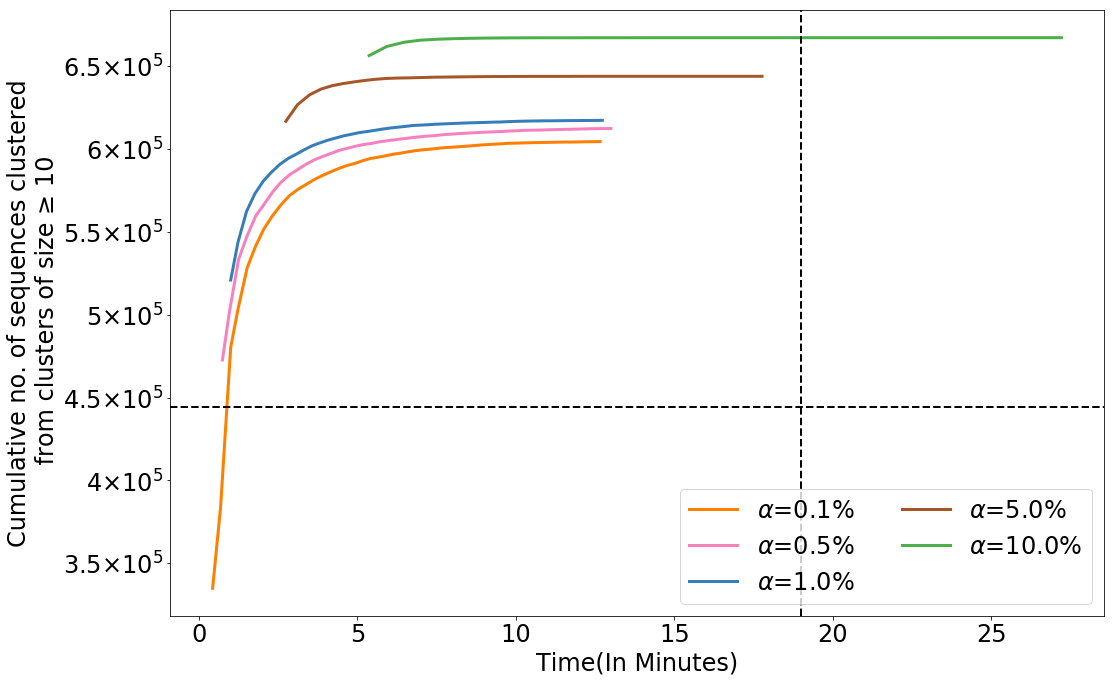

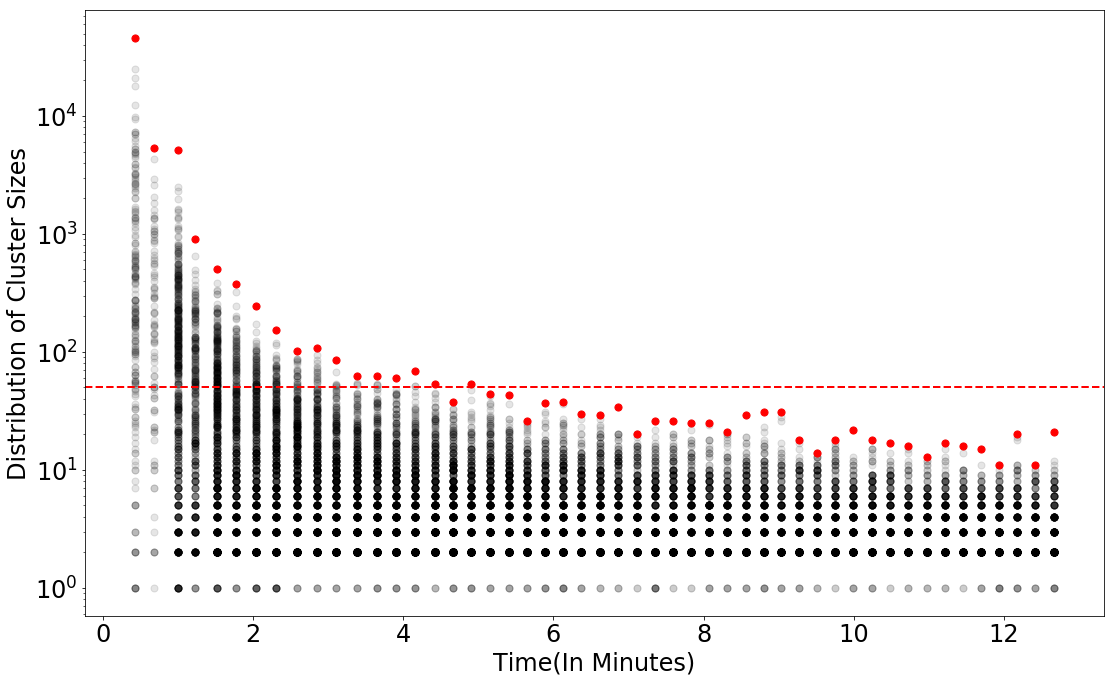

In [19]:
fig,ax = plt.subplots(1,1,figsize = (16,10))

for j in range(len(alpha)):
    print(alpha[j], np.sum(sim[alpha[j]][keys[0]]['Cluster_Summary']['Time(Total)']))
    ax.plot(np.cumsum(sim[alpha[j]][keys[0]]['Cluster_Summary']['Time(Total)']),
            np.cumsum(sim[alpha[j]][keys[0]]['Cluster_Summary']['Seqs_in_Cluster_Above_10']), 
            color = colors[j], label = r'$\alpha$='+str(alpha[j])+'%', linewidth=3)
ax.set_xlabel('Time(In Minutes)')
ax.set_ylabel('Cumulative no. of sequences clustered\n from clusters of size ≥ 10')
ax.legend()
t = np.array(sim['DNACLUST']['Clusters'])
t = t[t>=10]
ax.yaxis.set_major_formatter(mtick.FuncFormatter(g))
ax.axvline(times[s], linewidth = 2, color = 'black', linestyle = '--')
ax.axhline(t.sum(), linewidth = 2, color = 'black', linestyle = '--')
ax.legend(ncol = 2)
fig.tight_layout()
fig.savefig(out_path+'Cum_Seq_SCRAPT_Greater_Than_10_0.99.pdf')

df_1 = sim[0.1]['Adaptive_With_Modeshifting']['Clusters'].set_index('Iteration')
df_2 = sim[0.1]['Adaptive_With_Modeshifting']['Cluster_Summary'].cumsum()
df_temp = df_1.join(df_2[['Time(Total)']])
fig,ax = plt.subplots(1,1,figsize = (16,10))
df_temp.plot.scatter('Time(Total)', 'Density', alpha = 0.1, ax = ax, color = 'black', s = 50)
df_temp.reset_index().groupby('Iteration').max().plot.scatter('Time(Total)', 'Density', alpha = 1, 
                                                              ax = ax, color = 'red', s = 50)
ax.axhline(50, color = 'red', linestyle = '--', linewidth = 2)
ax.set_yscale('log')
ax.set_xlabel('Time(In Minutes)')
ax.set_ylabel('Distribution of Cluster Sizes')
fig.tight_layout()
fig.savefig(out_path+'Cluster_Distribution_SCRAPT_0.1_0.99.pdf')


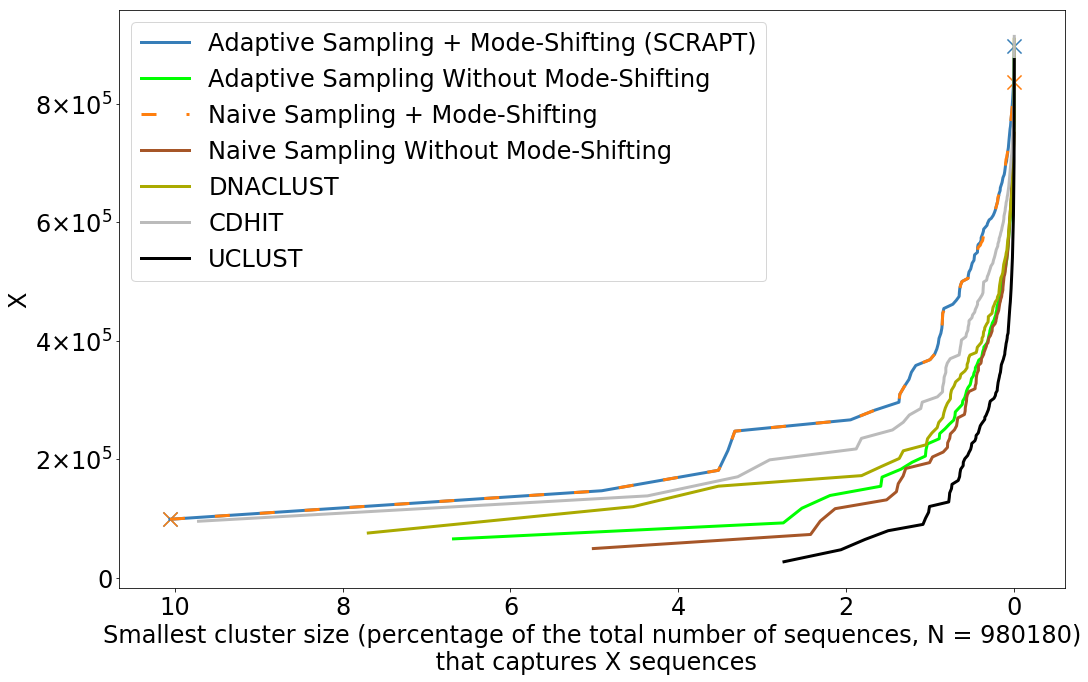

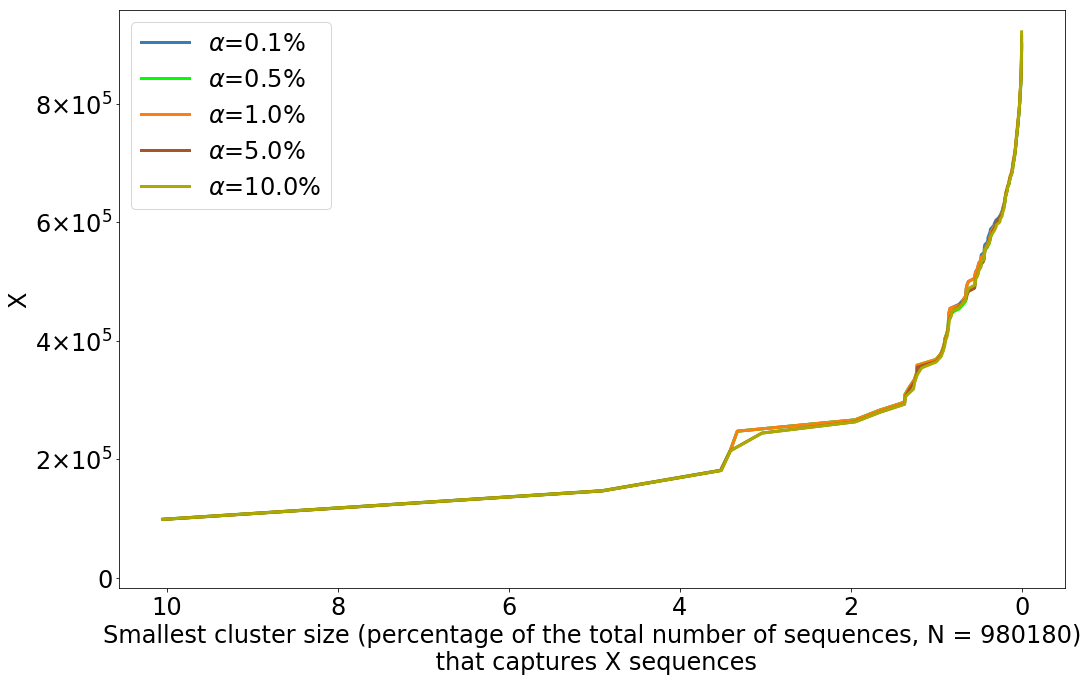

In [57]:
fig, ax = plt.subplots(1,1,figsize = (16,10))

for i in range(len(keys)):
    a = alpha[0]
    
    if keys[i] != 'DNACLUST' and keys[i] != 'UCLUST' and keys[i] != 'CDHIT':
        if i == 2:
            ax.plot(np.array(sim[a][keys[i]]['Fragmentation_Measure'][1])/n*100.0,
                    sim[a][keys[i]]['Fragmentation_Measure'][0], color = colors[i], label = titles[i], 
                    linewidth=3, linestyle = (0,(5,10)))
        else:
            ax.plot(np.array(sim[a][keys[i]]['Fragmentation_Measure'][1])/n*100.0,
                    sim[a][keys[i]]['Fragmentation_Measure'][0], color = colors[i], label = titles[i], 
                    linewidth=3)
    try:               
        if keys[i] == 'DNACLUST' or keys[i] == 'UCLUST' or keys[i] == 'CDHIT':
            ax.plot(np.array(sim[keys[i]]['Fragmentation_Measure'][1])/n*100.0,
                    sim[keys[i]]['Fragmentation_Measure'][0], color = colors[i], label = titles[i], 
                    linewidth=3)
            
            
    except KeyError:
        pass
try:    
    ax.scatter(np.array(sim[a][keys[0]]['Fragmentation_Measure'][1][-1])/n*100.0,
               sim[a][keys[0]]['Fragmentation_Measure'][0][-1], color = colors[0], s = 200,marker = 'x')
    ax.scatter(np.array(sim[a][keys[0]]['Fragmentation_Measure'][1][0])/n*100.0,
               sim[a][keys[0]]['Fragmentation_Measure'][0][0], color = colors[0], s = 200,marker = 'x')  

    ax.scatter(np.array(sim[a][keys[2]]['Fragmentation_Measure'][1][-1])/n*100.0,
               sim[a][keys[2]]['Fragmentation_Measure'][0][-1], color = colors[2], s = 200,marker = 'x')
    ax.scatter(np.array(sim[a][keys[2]]['Fragmentation_Measure'][1][0])/n*100.0,
               sim[a][keys[2]]['Fragmentation_Measure'][0][0], color = colors[2], s = 200,marker = 'x')  
except KeyError:
    pass

ax.set_xlim(ax.get_xlim()[::-1])
ylim = ax.get_ylim()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(g))
ax.legend()
ax.set_ylabel('X')
ax.set_xlabel('Smallest cluster size (percentage of the total number of sequences, N = '+str(n)+
              ')\n that captures X sequences')
fig.tight_layout()
fig.savefig(out_path+'Frag_Measure_Different_Methods.pdf')

fig,ax = plt.subplots(1,1,figsize = (16,10))
for i in range(len(alpha)):
    a = alpha[i]
    ax.plot(np.array(sim[a][keys[0]]['Fragmentation_Measure'][1])/n*100.0,
            sim[a][keys[0]]['Fragmentation_Measure'][0], color = colors[i],label = r'$\alpha$='+str(a)+'%', 
            linewidth=3)
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_ylim(ylim)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(g))
ax.legend()
ax.set_ylabel('X')
ax.set_xlabel('Smallest cluster size (percentage of the total number of sequences, N = '+str(n)+
              ')\n that captures X sequences')
fig.tight_layout()
#fig.savefig(out_path+'Frag_Measure_SCRAPT_Different_Alpha.pdf')

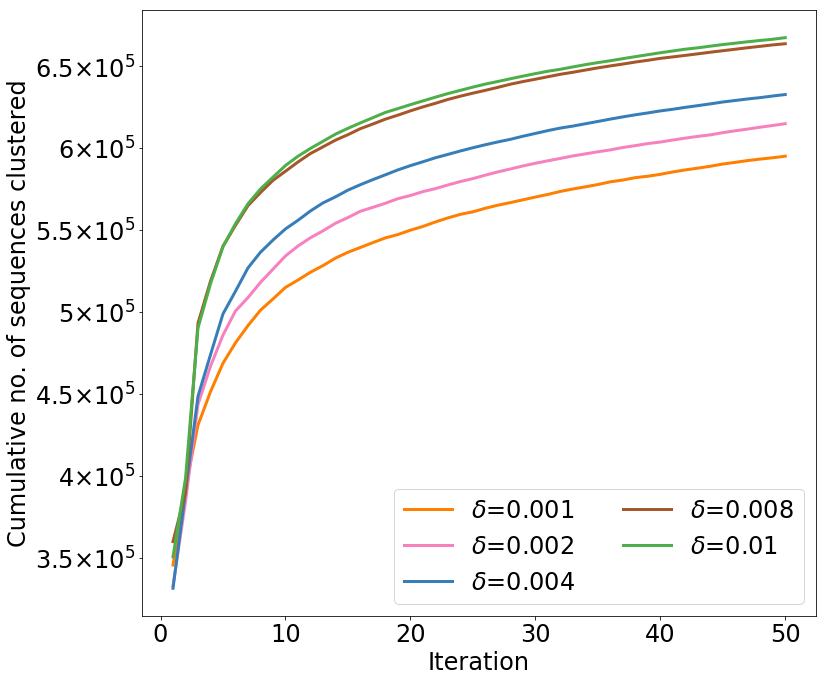

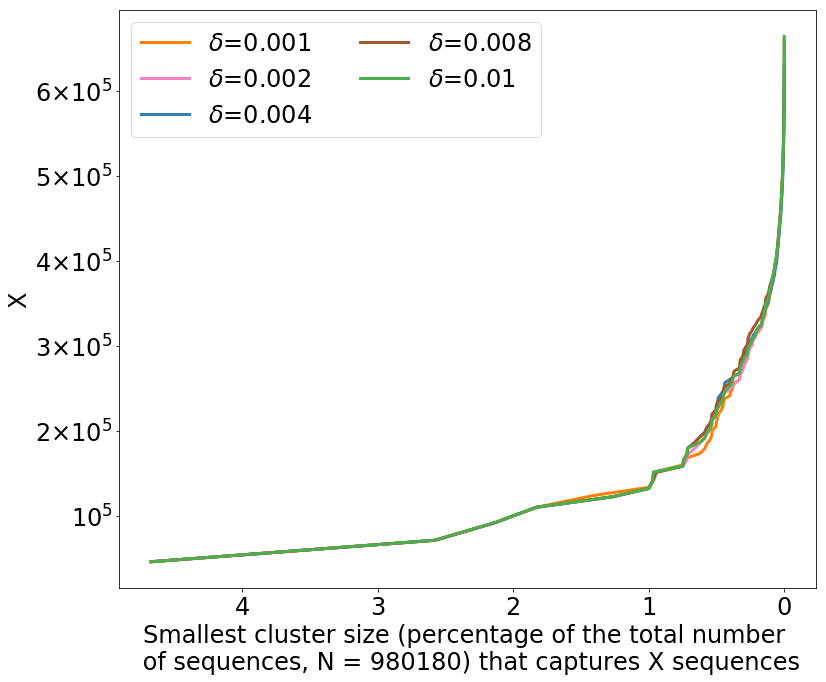

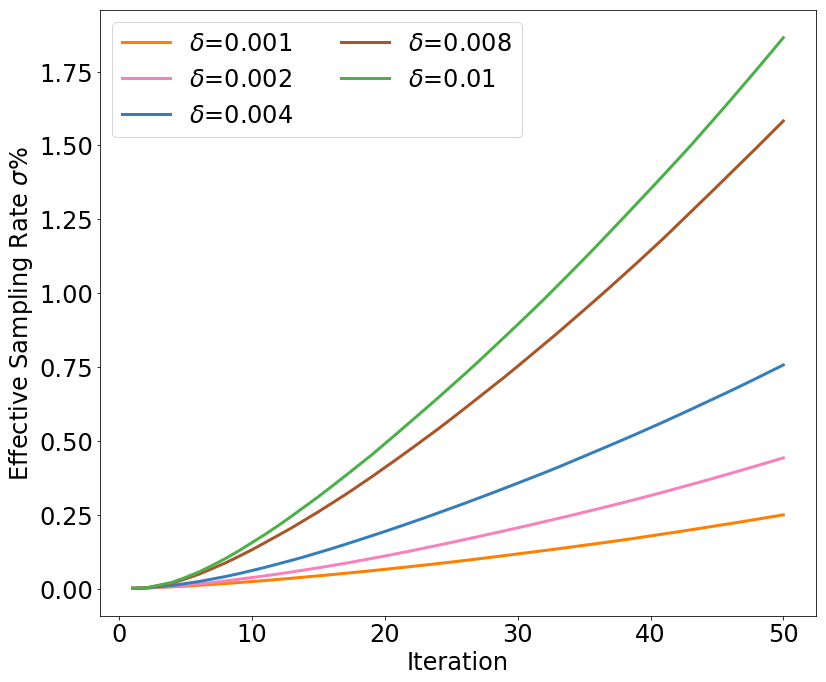

In [21]:
fig1, ax1 = plt.subplots(1,1, figsize = (12, 10))
fig2, ax2 = plt.subplots(1,1, figsize = (12, 10))
fig3, ax3 = plt.subplots(1,1, figsize = (12, 10))

delta = ['0.001','0.002','0.004','0.008','0.01']
a = alpha[0]

for i in range(len(delta)):
    d = delta[i]
    ax1.plot(np.cumsum(sim[a]['delta_'+d]['Cluster_Summary']['Seq_Counts']), 
             color = colors[i], label = r'$\delta$='+str(d), linewidth=3)
    ax2.plot(np.array(sim[a]['delta_'+d]['Fragmentation_Measure'][1])/n*100.0,
             np.array(sim[a]['delta_'+d]['Fragmentation_Measure'][0]),
             color = colors[i], label = r'$\delta$='+str(d), linewidth=3)
    ax3.plot(np.cumsum(sim[a]['delta_'+d]['Cluster_Summary']['Sampling Rate']), 
             color = colors[i], label = r'$\delta$='+str(d), linewidth=3)
ax1.legend(ncol = 2, loc = 4)
ax2.legend(ncol = 2, loc = 2)
ax3.legend(ncol = 2, loc = 2)

ax1.yaxis.set_major_formatter(mtick.FuncFormatter(g))
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(g))

ax1.set_xlabel('Iteration')
ax2.set_xlabel('Smallest cluster size (percentage of the total number \n of sequences, N = '+str(n)+
                 ') that captures X sequences')
ax3.set_xlabel('Iteration')

ax1.set_ylabel('Cumulative no. of sequences clustered')
ax2.set_ylabel('X')
ax3.set_ylabel('Effective Sampling Rate '+r'$\sigma$%')
ax2.set_xlim(ax2.get_xlim()[::-1])

fig1.tight_layout()
fig2.tight_layout()
fig3.tight_layout()

fig1.savefig(out_path+'Parameterize_Delta_Cum_Seqs_0.1_0.99.pdf')
fig2.savefig(out_path+'Parameterize_Delta_Frag_Measure_0.1_0.99.pdf')
fig3.savefig(out_path+'Parameterize_Delta_Effective_Sigma_0.1_0.99.pdf')
